In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from typing import List

from hypothesis_testing_pipeline import *


In [2]:
def print_vector_results(arr: np.ndarray) -> None:
    
    for i in range(arr.shape[0]):
        print(f"Question {i+1}: {arr[i]}")

# Preprocess

In [3]:
data = pd.read_csv('survey_data.csv', header=None)

question_list = []
q_num = 0
for i in range(len(data)):
    if i % 15 == 0:
        q_num += 1
    question_list.append(f'Q{q_num}')
data['Question'] = question_list

col_list = [f'Rater{i}' for i in range(1,13)] + ['Question']
data.columns = col_list

# The creator of the question: Human-made, PCMG, GPT2-based
creators = ['Human-made']*5 + ['PCMG']*5 + ['GPT2-based']*5
creator_list = creators*(len(data)//15)
# The type of data: Solvability or Readability
types = ['Solvability'] + ['Readability']*4
type_list = types*(len(data)//5)
data['Creator'] = creator_list
data['Type'] = type_list

In [4]:
solvability_data = data[data.Type == 'Solvability']
readability_data = data[data.Type == 'Readability']

### Solvability Vectors

In [5]:
human_s = solvability_data[solvability_data.Creator == 'Human-made'].iloc[:,:-3].to_numpy(dtype=float)
pcmg_s = solvability_data[solvability_data.Creator == 'PCMG'].iloc[:,:-3].to_numpy(dtype=float)
gpt2_s = solvability_data[solvability_data.Creator == 'GPT2-based'].iloc[:,:-3].to_numpy(dtype=float)

### Readability Vectors

In [6]:
# all the evaluation scores grouped by creator
human_r = readability_data[readability_data.Creator == 'Human-made'].iloc[:,:-3].to_numpy(dtype=float)
pcmg_r = readability_data[readability_data.Creator == 'PCMG'].iloc[:,:-3].to_numpy(dtype=float)
gpt2_r = readability_data[readability_data.Creator == 'GPT2-based'].iloc[:,:-3].to_numpy(dtype=float)

# Distribution Visualization

## Solvability DataFrame for Visualization

In [7]:
solvability_data_vis = solvability_data.copy()

In [8]:
solvability_data_vis['ScoreSum'] = solvability_data.sum(axis=1, numeric_only=True)
solvability_data_vis['ScoreMean'] = solvability_data.mean(axis=1, numeric_only=True)
solvability_data_vis['ScoreMedian'] = solvability_data.median(axis=1, numeric_only=True)

In [77]:
solvability_data_vis

,Rater1,Rater2,Rater3,Rater4,Rater5,Rater6,Rater7,Rater8,Rater9,Rater10,Rater11,Rater12,Question,Creator,Type,ScoreSum,ScoreMean,ScoreMedian
0,1,2,2,1,2,2,0,2,2,2,1,1,Q1,Human-made,Solvability,18,1.500000,2.0
5,1,1,1,1,2,1,0,2,2,2,2,2,Q1,PCMG,Solvability,17,1.416667,1.5
10,1,0,1,1,0,2,0,0,1,0,0,0,Q1,GPT2-based,Solvability,6,0.500000,0.0
15,2,2,2,2,2,2,0,2,2,2,2,2,Q2,Human-made,Solvability,22,1.833333,2.0
20,2,0,2,2,2,1,0,0,2,0,2,2,Q2,PCMG,Solvability,15,1.250000,2.0
25,2,0,2,2,2,1,0,0,2,0,2,2,Q2,GPT2-based,Solvability,15,1.250000,2.0
30,1,2,2,2,2,1,0,2,2,2,2,2,Q3,Human-made,Solvability,20,1.666667,2.0
35,1,0,2,1,2,2,0,2,1,0,2,0,Q3,PCMG,Solvability,13,1.083333,1.0
40,2,0,1,1,1,1,0,0,0,0,0,0,Q3,GPT2-based,Solvability,6,0.500000,0.0
45,1,1,2,1,2,1,0,2,2,2,2,2,Q4,Human-made,Solvability,18,1.500000,2.0


## Plots for Solvability Data

<AxesSubplot:xlabel='Question', ylabel='ScoreSum'>

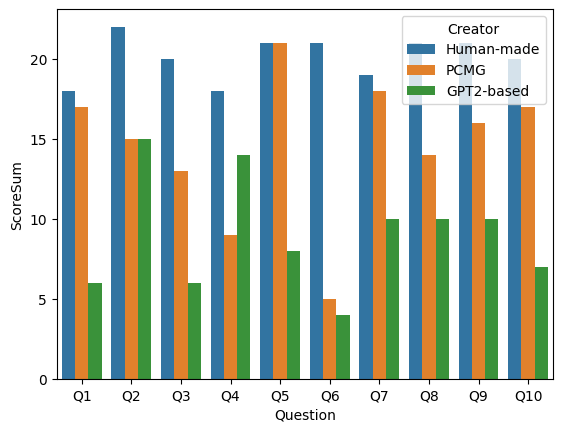

In [111]:
sns.barplot(data=solvability_data_vis, x="Question", y="ScoreSum", hue="Creator")

<AxesSubplot:xlabel='ScoreSum', ylabel='Creator'>

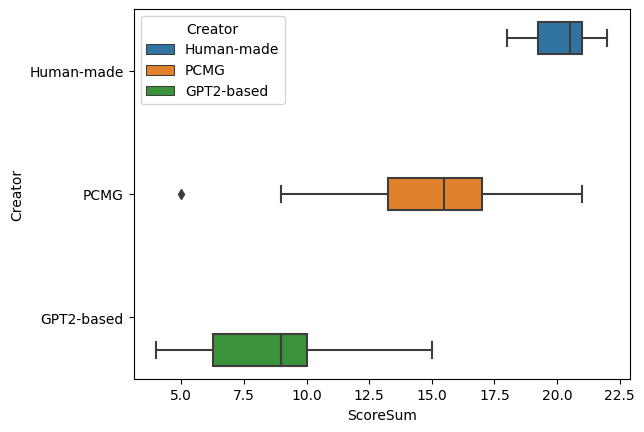

In [110]:
sns.boxplot(data=solvability_data_vis, x="ScoreSum", y="Creator", hue="Creator")

## Readability DataFrame for Visualization

In [13]:
readability_data_grouped = readability_data.groupby(['Creator','Question'],sort=False).mean()

In [14]:
readability_data_grouped_vis = readability_data_grouped.copy()

In [15]:
readability_data_grouped_vis['ScoreSum'] = readability_data_grouped.sum(axis=1, numeric_only=True)
readability_data_grouped_vis['ScoreMean'] = readability_data_grouped.mean(axis=1, numeric_only=True)
readability_data_grouped_vis['ScoreMedian'] = readability_data_grouped.median(axis=1, numeric_only=True)

In [16]:
readability_data_grouped_vis['Creator'] = ['Human-made','PCMG','GPT2-based']*10
q_type = []
for i in range(1,11):
    q_type += [f'Q{i}']*3
readability_data_grouped_vis['Question'] = q_type

## Plots for Readability Data

<AxesSubplot:xlabel='Question', ylabel='ScoreSum'>

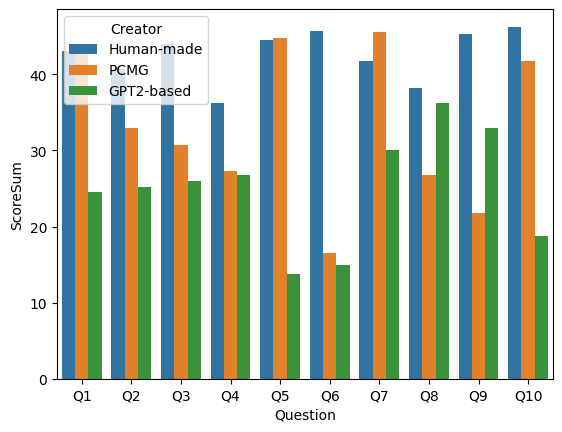

In [109]:
sns.barplot(data=readability_data_grouped_vis, x="Question", y="ScoreSum", hue="Creator")

<AxesSubplot:xlabel='ScoreSum', ylabel='Creator'>

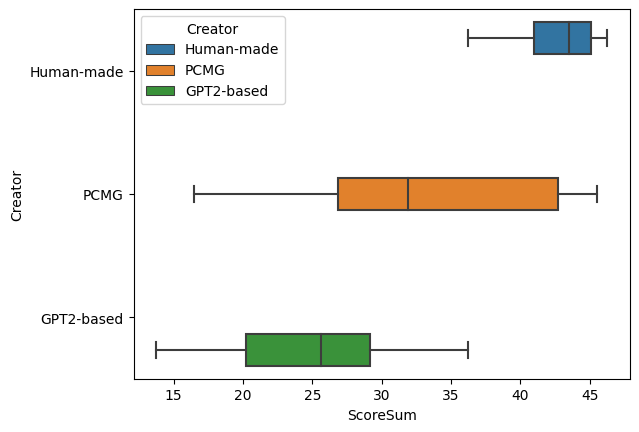

In [107]:
sns.boxplot(data=readability_data_grouped_vis, x="ScoreSum", y="Creator", hue="Creator")

# Point Statistics

## Mean Score of Each MWP --> 1x10 Vector

### Solvability

In [21]:
human_s_mean_q = solvability_data_vis[solvability_data_vis.Creator == 'Human-made']['ScoreMean'].to_numpy()
pcmg_s_mean_q = solvability_data_vis[solvability_data_vis.Creator == 'PCMG']['ScoreMean'].to_numpy()
gpt2_s_mean_q = solvability_data_vis[solvability_data_vis.Creator == 'GPT2-based']['ScoreMean'].to_numpy()

In [22]:

def grouped_avg_of_question(arr: np.ndarray, n: int=4) -> np.ndarray:
    result = np.cumsum(arr, 0)[n-1::n]/float(n)
    result[1:] = result[1:] - result[:-1]
    return result

### Readability

In [23]:
human_r_mean_q = readability_data_grouped_vis[readability_data_grouped_vis.Creator == 'Human-made']['ScoreMean'].to_numpy()
pcmg_r_mean_q = readability_data_grouped_vis[readability_data_grouped_vis.Creator == 'PCMG']['ScoreMean'].to_numpy()
gpt2_r_mean_q = readability_data_grouped_vis[readability_data_grouped_vis.Creator == 'GPT2-based']['ScoreMean'].to_numpy()

In [24]:
print("Human-made Mean")
print_vector_results(human_r_mean_q)

Human-made Mean
Question 1: 3.5833333333333335
Question 2: 3.3958333333333335
Question 3: 3.6666666666666665
Question 4: 3.0208333333333335
Question 5: 3.7083333333333335
Question 6: 3.8125
Question 7: 3.4791666666666665
Question 8: 3.1875
Question 9: 3.7708333333333335
Question 10: 3.8541666666666665


In [25]:
print("PCMG Mean")
print_vector_results(pcmg_r_mean_q)

PCMG Mean
Question 1: 3.5833333333333335
Question 2: 2.75
Question 3: 2.5625
Question 4: 2.2708333333333335
Question 5: 3.7291666666666665
Question 6: 1.375
Question 7: 3.7916666666666665
Question 8: 2.2291666666666665
Question 9: 1.8125
Question 10: 3.4791666666666665


In [26]:
print("GPT2-based Mean")
print_vector_results(gpt2_r_mean_q)

GPT2-based Mean
Question 1: 2.0416666666666665
Question 2: 2.1041666666666665
Question 3: 2.1666666666666665
Question 4: 2.2291666666666665
Question 5: 1.1458333333333333
Question 6: 1.25
Question 7: 2.5
Question 8: 3.0208333333333335
Question 9: 2.75
Question 10: 1.5625


## Mean Score of Each Creator --> Scalar

In [27]:
# Solvability
human_s_mean = human_s_mean_q.mean(axis=0)
pcmg_s_mean = pcmg_s_mean_q.mean(axis=0)
gpt2_s_mean = gpt2_s_mean_q.mean(axis=0)
print(f'풀이 가능성 Mean\nHuman-made: {human_s_mean}, PCMG:{pcmg_s_mean}, GPT2-based: {gpt2_s_mean}')

풀이 가능성 Mean
Human-made: 1.675, PCMG:1.2083333333333335, GPT2-based: 0.75


In [28]:
# Readability
human_r_mean = human_r_mean_q.mean(axis=0)
pcmg_r_mean = pcmg_r_mean_q.mean(axis=0)
gpt2_r_mean = gpt2_r_mean_q.mean(axis=0)
print(f'독해 가능성 Mean\nHuman-made: {human_r_mean}, PCMG:{pcmg_r_mean}, GPT2-based: {gpt2_r_mean}')

독해 가능성 Mean
Human-made: 3.5479166666666666, PCMG:2.7583333333333337, GPT2-based: 2.0770833333333334


## Std. Dev. of Each Creator --> Scalar

In [29]:
# Solvability
human_s_std = human_s_mean_q.std(axis=0)
pcmg_s_std = pcmg_s_mean_q.std(axis=0)
gpt2_s_std = gpt2_s_mean_q.std(axis=0)
print(f'풀이 가능성 Std. Dev.\nHuman-made: {human_s_std}, PCMG:{pcmg_s_std}, GPT2-based: {gpt2_s_std}')

풀이 가능성 Std. Dev.
Human-made: 0.10833333333333332, PCMG:0.3656235161413384, GPT2-based: 0.27888667551135854


In [30]:
# Solvability
human_r_std = human_r_mean_q.std(axis=0)
pcmg_r_std = pcmg_r_mean_q.std(axis=0)
gpt2_r_std = gpt2_r_mean_q.std(axis=0)
print(f'독해 가능성 Std. Dev.\nHuman-made: {human_r_std}, PCMG:{pcmg_r_std}, GPT2-based: {gpt2_r_std}')

독해 가능성 Std. Dev.
Human-made: 0.26270659859326795, PCMG:0.8108530316209522, GPT2-based: 0.5806523211488572


## Sum Score of Each MWP (For Median calculation)

### Solvability

In [72]:
human_s_sum_q = solvability_data_vis[solvability_data_vis.Creator == 'Human-made']['ScoreSum'].to_numpy()
pcmg_s_sum_q = solvability_data_vis[solvability_data_vis.Creator == 'PCMG']['ScoreSum'].to_numpy()
gpt2_s_sum_q = solvability_data_vis[solvability_data_vis.Creator == 'GPT2-based']['ScoreSum'].to_numpy()

### Readability

In [81]:
human_r_sum_q = readability_data_grouped_vis[readability_data_grouped_vis.Creator == 'Human-made']['ScoreSum'].to_numpy()
pcmg_r_sum_q = readability_data_grouped_vis[readability_data_grouped_vis.Creator == 'PCMG']['ScoreSum'].to_numpy()
gpt2_r_sum_q = readability_data_grouped_vis[readability_data_grouped_vis.Creator == 'GPT2-based']['ScoreSum'].to_numpy()

## Median Score of Each Creator

### Solvability

In [80]:
human_s_median = np.median(human_s_sum_q, axis=0)
pcmg_s_median = np.median(pcmg_s_sum_q, axis=0)
gpt2_s_median = np.median(gpt2_s_sum_q, axis=0)
print(f'풀이 가능성 Mean\nHuman-made: {human_s_median}, PCMG:{pcmg_s_median}, GPT2-based: {gpt2_s_median}')

풀이 가능성 Mean
Human-made: 20.5, PCMG:15.5, GPT2-based: 9.0


### Readability

In [82]:
human_r_median = np.median(human_r_sum_q, axis=0)
pcmg_r_median = np.median(pcmg_r_sum_q, axis=0)
gpt2_r_median = np.median(gpt2_r_sum_q, axis=0)
print(f'풀이 가능성 Mean\nHuman-made: {human_s_median}, PCMG:{pcmg_s_median}, GPT2-based: {gpt2_s_median}')

풀이 가능성 Mean
Human-made: 20.5, PCMG:15.5, GPT2-based: 9.0


# Hypotheses

## Using Mean

In [35]:
# hypo_1_mean = np.concatenate((pcmg_s_mean_q.reshape(1,-1),human_s_mean_q.reshape(1,-1)),axis=0)
# hypo_2_mean = np.concatenate((pcmg_r_mean_q.reshape(1,-1),human_r_mean_q.reshape(1,-1)),axis=0)
# hypo_3_mean = np.concatenate((pcmg_s_mean_q.reshape(1,-1),gpt2_s_mean_q.reshape(1,-1)),axis=0)
# hypo_4_mean = np.concatenate((pcmg_r_mean_q.reshape(1,-1),gpt2_r_mean_q.reshape(1,-1)),axis=0)

In [118]:
hypo_1 = np.concatenate((pcmg_s_sum_q.reshape(1,-1),human_s_sum_q.reshape(1,-1)),axis=0)
hypo_2 = np.concatenate((pcmg_r_sum_q.reshape(1,-1),human_r_sum_q.reshape(1,-1)),axis=0)
hypo_3 = np.concatenate((pcmg_s_sum_q.reshape(1,-1),gpt2_s_sum_q.reshape(1,-1)),axis=0)
hypo_4 = np.concatenate((pcmg_r_sum_q.reshape(1,-1),gpt2_r_sum_q.reshape(1,-1)),axis=0)

In [37]:
# hypo_1_median = np.concatenate((pcmg_s.reshape(1,-1),human_s.reshape(1,-1)),axis=0)
# hypo_2_median = np.concatenate((pcmg_r.reshape(1,-1),human_r.reshape(1,-1)),axis=0)
# hypo_3_median = np.concatenate((pcmg_s.reshape(1,-1),gpt2_s.reshape(1,-1)),axis=0)
# hypo_4_median = np.concatenate((pcmg_r.reshape(1,-1),gpt2_r.reshape(1,-1)),axis=0)

# Independence Testing of Ordinal Data (Applies for only Mean Hypo.)

In [119]:
IndependenceTester(hypo_1).print_results()

Statistic: 0.02629859456760873, p-value: 0.9425115952865993, Independent?: True


In [120]:
IndependenceTester(hypo_2).print_results()

Statistic: 0.0861468451969929, p-value: 0.8129460718784188, Independent?: True


In [121]:
IndependenceTester(hypo_3).print_results()

Statistic: 0.0885358118585193, p-value: 0.8078389010433495, Independent?: True


In [123]:
IndependenceTester(hypo_4).print_results()

Statistic: -0.20195841156943253, p-value: 0.5757984204564827, Independent?: True


# Skewness Test

## Solvability

In [92]:
concat_vec_s = np.concatenate([human_s_sum_q.reshape((1,-1)), pcmg_s_sum_q.reshape((1,-1)), gpt2_s_sum_q.reshape((1,-1))], axis=1)
SkewTester(concat_vec_s).print_results()

Statistic: -1.0255233316249752, p-value: 0.30511632226555074, Skewed?: False


In [88]:
SkewTester(human_s_sum_q.reshape((1,-1))).print_results()

Statistic: -0.8147039535789896, p-value: 0.41524178976383075, Skewed?: False


In [90]:
SkewTester(pcmg_s_sum_q.reshape((1,-1))).print_results()

Statistic: -1.3975694498626985, p-value: 0.16224239771569782, Skewed?: False


In [89]:
SkewTester(gpt2_s_sum_q.reshape((1,-1))).print_results()

Statistic: 0.7400613740836575, p-value: 0.45926275469669986, Skewed?: False


## Readability

In [93]:
concat_vec_r = np.concatenate([human_r_sum_q.reshape((1,-1)), pcmg_r_sum_q.reshape((1,-1)), gpt2_r_sum_q.reshape((1,-1))], axis=1)
SkewTester(concat_vec_r).print_results()

Statistic: -0.9969288939028588, p-value: 0.3187990255876316, Skewed?: False


In [94]:
SkewTester(human_r_sum_q.reshape((1,-1))).print_results()

Statistic: -1.2865910583768865, p-value: 0.1982368619306507, Skewed?: False


In [95]:
SkewTester(pcmg_r_sum_q.reshape((1,-1))).print_results()

Statistic: -0.2718282336380906, p-value: 0.7857540950386581, Skewed?: False


In [96]:
SkewTester(gpt2_r_sum_q.reshape((1,-1))).print_results()

Statistic: -0.25990885957163323, p-value: 0.7949340771243167, Skewed?: False


# ~~Hypothesis Testing (Mean)~~

In [124]:
# PAIRED = False
# NORMAL = False

In [51]:
# HypothesisTester(hypo_1_mean, is_tost=True, is_pair=PAIRED, normality=NORMAL).print_results()

Mann-Whitney U-test TOST
p-value: 0.0452876244781712, reject_alternative: False


In [52]:
# HypothesisTester(hypo_2_mean, is_tost=True, is_pair=PAIRED, normality=NORMAL).print_results()

Mann-Whitney U-test TOST
p-value: 0.03371010091856606, reject_alternative: False


In [53]:
# HypothesisTester(hypo_3_mean, is_pair=PAIRED, normality=NORMAL).print_results()

Mann-Whitney U-test
statistic: 82.0, p-value: 0.008461645299615038, reject_alternative: False


In [54]:
# HypothesisTester(hypo_4_mean, is_pair=PAIRED, normality=NORMAL).print_results()

Mann-Whitney U-test
statistic: 75.0, p-value: 0.03191109209591804, reject_alternative: False


## Alternatives

In [55]:
hypo_4_alt = np.concatenate((gpt2_r_mean_q.reshape(1,-1),human_r_mean_q.reshape(1,-1)),axis=0)

In [56]:
HypothesisTester(hypo_4_alt, is_pair=PAIRED, normality=NORMAL).print_results()

Mann-Whitney U-test
statistic: 0.5, p-value: 0.9999219210091544, reject_alternative: True


In [57]:
HypothesisTester(hypo_4_alt, is_tost=True, is_pair=PAIRED, normality=NORMAL).print_results()

Mann-Whitney U-test TOST
p-value: 0.1303030303030303, reject_alternative: True


# Hypothesis Testing (Median)

In [104]:
hypo_1.sort(axis=1)
HypothesisTester(hypo_1, is_tost=True, is_pair=PAIRED, normality=NORMAL).print_results()

Mann-Whitney U-test TOST
p-value: 0.030942788904386474, reject_alternative: False


In [101]:
hypo_2.sort(axis=1)
HypothesisTester(hypo_2, is_tost=True, is_pair=PAIRED, normality=NORMAL).print_results()


Mann-Whitney U-test TOST
p-value: 0.02253291378675904, reject_alternative: False


In [105]:
hypo_3.sort(axis=1)
HypothesisTester(hypo_3, is_tost=True, is_pair=PAIRED, normality=NORMAL).print_results()

Mann-Whitney U-test TOST
p-value: 0.27977097174215076, reject_alternative: True


In [106]:
hypo_4.sort(axis=1)
HypothesisTester(hypo_4, is_tost=True, is_pair=PAIRED, normality=NORMAL).print_results()

Mann-Whitney U-test TOST
p-value: 0.15325214032343068, reject_alternative: True
